### Amazon Mobile Price Analysis & Visualizing

Description: Conducted web scraping on Amazon platform to systematically collect data on mobile price, product specifications, customer ratings, and availability. 

Key skills: Data Manipulation, Python libraries, Dataset Handling, Web scraping, Cleaning, Preprocessing, Statsistical analysis, Visualizing the data

In [ ]:
# Using python libraries, pip installations

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
# Extract Mobile Name
def get_title(soup):
    try:
        title = soup.find('span',id="productTitle")
        
        title_value = title.get_text(strip=True)
        
    except AttributeError:
        title_value = ''
        
    return title_value


# Extract Mobile Price
def get_price(soup):

    try:
        price = soup.find('span',class_="a-price-whole")

        price_value = price.get_text(strip=True)
        
    except AttributeError:

        price_value =''

    return price_value

# Extrating Star rating
def get_star_rating(soup):
    
    try:
        star_rating = soup.find('span', class_="a-icon-alt").get_text(strip=True)
    
    except AttributeError:
        star_rating = ''
    return star_rating


# Extracting Count of rating
def get_review_count(soup):
    try:
        review_count = soup.find('span',id="acrCustomerReviewText").get_text(strip=True)

    except AttributeError:

        review_count = ''

    return review_count

# Extracting Availability status
def get_availability(soup):

    try:
        available = soup.find("div",id='availability').get_text(strip=True)
        
    except AttributeError:
        available = 'Not Available'

    return available

In [3]:
# Scraping the data from amazon website.
if __name__ == '__main__':
    
    # User agent
    HEADERS = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})

    #Webpage URL
    BASE_URL = 'https://www.amazon.in/s?k=mobile&crid=1HG22JWSAFQXT&sprefix=%2Caps%2C455&ref=nb_sb_ss_recent_1_0_recent'

    #HTTP Request
    page_number = 1
    product_count = 0
    df = {'Title':[],'Price':[],'Rating':[],'Reviews':[],'Availability':[]}
    
    
#Collect the 200 product details
    
    while product_count<200:
        URL = f"{BASE_URL}&page={page_number}"
        webpage = requests.get(URL, headers=HEADERS)
        if webpage.status_code != 200:
            print(f'Failed to fetch page{page_number}.Status code:{webpage.status_code}')
            break
        soup = BeautifulSoup(webpage.content, 'html.parser')

        #Fetch links as list of Tag Objects
        links = soup.find_all('a', attrs={'class':'a-link-normal s-no-outline'})

        links_list = []
        
#get the href link
        
        for link in links:
            links_list.append(link.get('href'))

        # looping through the extract product details from each link
        for link in links_list:
            if link.startswith('http'):
                full_url = link
            else:
                full_url = 'https://www.amazon.in' + link

            new_webpage = requests.get(full_url, headers=HEADERS)
            new_soup = BeautifulSoup(new_webpage.content, 'html.parser')

            # Display the product informations
            df['Title'].append(get_title(new_soup))
            df['Price'].append(get_price(new_soup))
            df['Rating'].append(get_star_rating(new_soup))
            df['Reviews'].append(get_review_count(new_soup))
            df['Availability'].append(get_availability(new_soup))

            product_count +=1
            if product_count >=200:
                break

        page_number +=1

    amazon_df = pd.DataFrame(df)
    amazon_df['Product Name'] = amazon_df['Title'].astype(str).str.split('(').str[0].str.strip()
    amazon_df['Product Name'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['Product Name'])
    amazon_df.to_csv('amazon_data.csv', header=True, index=False)


In [4]:
amazon_df

,Title,Price,Rating,Reviews,Availability,Product Name
0,Apple iPhone 13 (128GB) - Green,"49,999.",4.6 out of 5 stars,"25,414 ratings",,Apple iPhone 13
1,Apple iPhone 15 (128 GB) - Black,"71,290.",4.5 out of 5 stars,911 ratings,In stock,Apple iPhone 15
2,"OPPO A59 5G (Starry Black, 4GB RAM, 128GB Stor...","13,999.",4.2 out of 5 stars,37 ratings,In stock,OPPO A59 5G
3,"OPPO A59 5G (Starry Black, 6GB RAM, 128GB Stor...","15,499.",4.4 out of 5 stars,18,In stock,OPPO A59 5G
4,"OPPO A59 5G (Silk Gold, 6GB RAM, 128GB Storage...","15,499.",3.9 out of 5 stars,16,In stock,OPPO A59 5G
...,...,...,...,...,...,...
195,Apple iPhone 15 (128 GB) - Pink,"71,290.",4.5 out of 5 stars,911 ratings,In stock,Apple iPhone 15
196,"Vivo Y16 (Drizzling Gold, 4GB RAM, 64GB Storag...","8,999.",4.0 out of 5 stars,931,In stock,Vivo Y16
197,"Vivo Y02t (Sunset Gold, 4GB RAM, 64GB Storage)...","7,499.",4.1 out of 5 stars,363,In stock,Vivo Y02t
198,"HONOR 90 (Midnight Black, 12GB + 512GB) | Indi...","29,999.",4.0 out of 5 stars,"2,720 ratings",In stock,HONOR 90


### Data Cleaning

Removing the duplicate values, data doesn't have any null values, and duplicate values. From the scracth filter the data and develop the minimum content of the data, which is only scrape the 200 mobile details then summaries the which one is top rated, and pricing, and reviewed product of the amazon sales. Here cleaning is the process of the filtering the smoothness of collecting the data.

In [5]:
amazon_df.isnull().sum()

Title           0
Price           0
Rating          0
Reviews         0
Availability    0
Product Name    0
dtype: int64

In [6]:
amazon_df.isna().sum()

Title           0
Price           0
Rating          0
Reviews         0
Availability    0
Product Name    0
dtype: int64

In [7]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         200 non-null    object
 1   Price         200 non-null    object
 2   Rating        200 non-null    object
 3   Reviews       200 non-null    object
 4   Availability  200 non-null    object
 5   Product Name  200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


In [8]:
amazon_df.dtypes

Title           object
Price           object
Rating          object
Reviews         object
Availability    object
Product Name    object
dtype: object

In [16]:
# get the particular values from price, rating, review
amazon_df = pd.read_csv('amazon_data.csv')
amazon_df.drop_duplicates(inplace=True)
amazon_df.dropna(inplace=True)
amazon_df['Price'] = amazon_df['Price'].str.replace(',','').astype(float) # Replacing '' it.
amazon_df['Rating'] = amazon_df['Rating'].str.replace('out of 5 stars','').astype(float) # Replacing with empty
amazon_df['Reviews'] = amazon_df['Reviews'].str.replace('ratings','') #.str.replace(',','') # Removing the rating from the Reviews

print(amazon_df)

                                                 Title    Price  Rating  \
1                     Apple iPhone 15 (128 GB) - Black  71290.0     4.5   
2    OPPO A59 5G (Starry Black, 4GB RAM, 128GB Stor...  13999.0     4.2   
3    OPPO A59 5G (Starry Black, 6GB RAM, 128GB Stor...  15499.0     4.4   
4    OPPO A59 5G (Silk Gold, 6GB RAM, 128GB Storage...  15499.0     3.9   
5    Systene 36W 8A 4 Port USB QC 3.0 Car Charger F...    899.0     4.0   
..                                                 ...      ...     ...   
191               Apple iPhone 15 Plus (128 GB) - Pink  80990.0     4.5   
195                    Apple iPhone 15 (128 GB) - Pink  71290.0     4.5   
196  Vivo Y16 (Drizzling Gold, 4GB RAM, 64GB Storag...   8999.0     4.0   
198  HONOR 90 (Midnight Black, 12GB + 512GB) | Indi...  29999.0     4.0   
199             POCO C65 Pastel Blue 8GB RAM 256GB ROM   9499.0     4.6   

    Reviews Availability                                       Product Name  
1      911      In st

In [17]:
# get the particular product name from the title
amazon_df['Product Name'] = amazon_df['Title'].str.split('(').str[0].str.strip()
amazon_df['Product Name']

1                                        Apple iPhone 15
2                                            OPPO A59 5G
3                                            OPPO A59 5G
4                                            OPPO A59 5G
5      Systene 36W 8A 4 Port USB QC 3.0 Car Charger F...
                             ...                        
191                                 Apple iPhone 15 Plus
195                                      Apple iPhone 15
196                                             Vivo Y16
198                                             HONOR 90
199               POCO C65 Pastel Blue 8GB RAM 256GB ROM
Name: Product Name, Length: 142, dtype: object

In [18]:
amazon_df['Reviews'] = amazon_df['Reviews'].str.replace(',', '')
amazon_df['Reviews'] = amazon_df['Reviews'].str.extract('(\d+)')  # Extract only numeric values

# Convert 'Reviews' column to integer type
amazon_df['Reviews'] = amazon_df['Reviews'].astype(int)

print(amazon_df)

                                                 Title    Price  Rating  \
1                     Apple iPhone 15 (128 GB) - Black  71290.0     4.5   
2    OPPO A59 5G (Starry Black, 4GB RAM, 128GB Stor...  13999.0     4.2   
3    OPPO A59 5G (Starry Black, 6GB RAM, 128GB Stor...  15499.0     4.4   
4    OPPO A59 5G (Silk Gold, 6GB RAM, 128GB Storage...  15499.0     3.9   
5    Systene 36W 8A 4 Port USB QC 3.0 Car Charger F...    899.0     4.0   
..                                                 ...      ...     ...   
191               Apple iPhone 15 Plus (128 GB) - Pink  80990.0     4.5   
195                    Apple iPhone 15 (128 GB) - Pink  71290.0     4.5   
196  Vivo Y16 (Drizzling Gold, 4GB RAM, 64GB Storag...   8999.0     4.0   
198  HONOR 90 (Midnight Black, 12GB + 512GB) | Indi...  29999.0     4.0   
199             POCO C65 Pastel Blue 8GB RAM 256GB ROM   9499.0     4.6   

     Reviews Availability                                       Product Name  
1        911     In 

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ebich\AppData\Local\Temp\ipykernel_27816\2385523210.py:2: SyntaxWarning: invalid escape sequence '\d'
  amazon_df['Reviews'] = amazon_df['Reviews'].str.extract('(\d+)')  # Extract only numeric values


In [19]:
# short the product name which is more readable format
amazon_df['Mobile Name'] = amazon_df['Product Name'].str[:15]
amazon_df = amazon_df[['Mobile Name', 'Price', 'Rating', 'Reviews', 'Availability']]
print(amazon_df)

         Mobile Name    Price  Rating  Reviews Availability
1    Apple iPhone 15  71290.0     4.5      911     In stock
2        OPPO A59 5G  13999.0     4.2       37     In stock
3        OPPO A59 5G  15499.0     4.4       18     In stock
4        OPPO A59 5G  15499.0     3.9       16     In stock
5    Systene 36W 8A     899.0     4.0      119     In stock
..               ...      ...     ...      ...          ...
191  Apple iPhone 15  80990.0     4.5      441     In stock
195  Apple iPhone 15  71290.0     4.5      911     In stock
196         Vivo Y16   8999.0     4.0      931     In stock
198         HONOR 90  29999.0     4.0     2720     In stock
199  POCO C65 Pastel   9499.0     4.6        3     In stock

[142 rows x 5 columns]


In [20]:
amazon_df.dtypes

Mobile Name      object
Price           float64
Rating          float64
Reviews           int32
Availability     object
dtype: object

In [21]:
# Top 10 Price, Rating, Reviews
top_pricing = amazon_df.sort_values(by='Price', ascending=False).head(10)
print('Tob 10 Pricing List:')
print(top_pricing.head(10))


Tob 10 Pricing List:
         Mobile Name     Price  Rating  Reviews Availability
46   Apple iPhone 15  148900.0     4.5      196     In stock
180  Apple iPhone 15  137990.0     4.2      180     In stock
12   Apple iPhone 15  127990.0     4.2      180     In stock
133  Apple iPhone 15  127990.0     4.2      180     In stock
36   Apple iPhone 15  127990.0     4.2      180     In stock
132  Apple iPhone 14   96999.0     4.5     1757     In stock
176  Apple iPhone 15   80990.0     4.5      911     In stock
158  Apple iPhone 15   80990.0     4.5      441     In stock
142  Apple iPhone 15   80990.0     4.5      441     In stock
191  Apple iPhone 15   80990.0     4.5      441     In stock


In [22]:
top_reviews = amazon_df.sort_values(by='Reviews',ascending=False).head(10)
print('Tob 10 Reviews List:')
print(top_reviews.head(10))

Tob 10 Reviews List:
         Mobile Name    Price  Rating  Reviews Availability
42   OnePlus Nord CE  17999.0     4.2    46647     In stock
45   OnePlus Nord CE  17999.0     4.2    46647     In stock
21   OnePlus Nord CE  19999.0     4.2    46647     In stock
185  OnePlus Nord CE  19999.0     4.2    46647     In stock
98   Apple iPhone 13  49999.0     4.6    25414     In stock
74   Apple iPhone 13  49499.0     4.6    25414     In stock
122  Apple iPhone 13  49499.0     4.6    25414     In stock
146  Apple iPhone 13  49999.0     4.6    25414     In stock
20   iQOO Z6 Lite 5G  11499.0     4.1    21873     In stock
38   iQOO Z6 Lite 5G  11499.0     4.1    21873     In stock


In [23]:
top_rating = amazon_df.sort_values(by='Rating',ascending=False).head(10)
print('Tob 10 Rating List:')
print(top_rating.head(10))


Tob 10 Rating List:
         Mobile Name    Price  Rating  Reviews Availability
165    Nothing Phone  25499.0     5.0        3     In stock
92     Nothing Phone  25499.0     5.0        3     In stock
98   Apple iPhone 13  49999.0     4.6    25414     In stock
74   Apple iPhone 13  49499.0     4.6    25414     In stock
146  Apple iPhone 13  49999.0     4.6    25414     In stock
122  Apple iPhone 13  49499.0     4.6    25414     In stock
101    Vivo Y200e 5G  20999.0     4.6       11     In stock
199  POCO C65 Pastel   9499.0     4.6        3     In stock
1    Apple iPhone 15  71290.0     4.5      911     In stock
191  Apple iPhone 15  80990.0     4.5      441     In stock


In [26]:
amazon_df

,Mobile Name,Price,Rating,Reviews,Availability
1,Apple iPhone 15,71290.0,4.5,911,In stock
2,OPPO A59 5G,13999.0,4.2,37,In stock
3,OPPO A59 5G,15499.0,4.4,18,In stock
4,OPPO A59 5G,15499.0,3.9,16,In stock
5,Systene 36W 8A,899.0,4.0,119,In stock
...,...,...,...,...,...
191,Apple iPhone 15,80990.0,4.5,441,In stock
195,Apple iPhone 15,71290.0,4.5,911,In stock
196,Vivo Y16,8999.0,4.0,931,In stock
198,HONOR 90,29999.0,4.0,2720,In stock


### Machine learning model

Here train the data into predicted values to analyse the future. what are the benifit to aling with data. Linner Regression, and train the data into models, and testing the data, using machine learning concepts like sklearn.model selection, liner model, and metrics,and preprocessing the standardise the data calculations.

Mean Squared Error: 564711460.4274969
R-squared Score: 0.12904579350296141


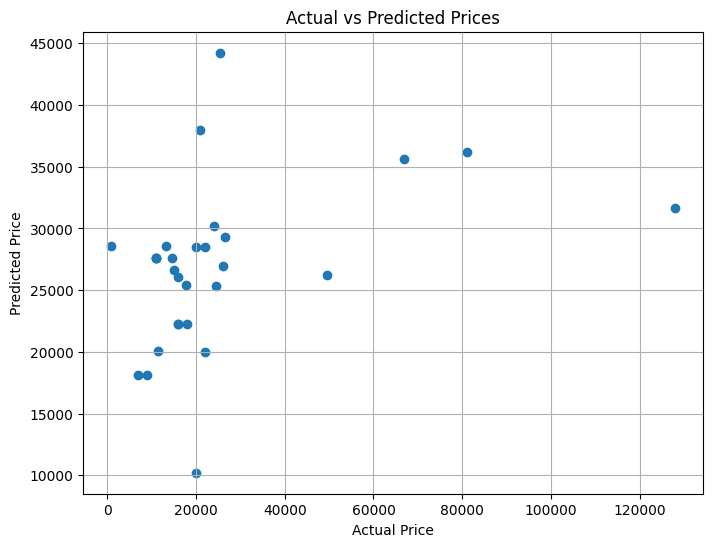

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = amazon_df[['Rating', 'Reviews']]  # Features
y = amazon_df['Price']  # Target variable

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initialization and training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


### Data Visualization

Data visulaization is the process of deliver the data into chart, plot format. in this way we can understand the where the particularly understand the concept, and market trends and values.  visualization is the major usefull for the future. we can access everything with this concepts.

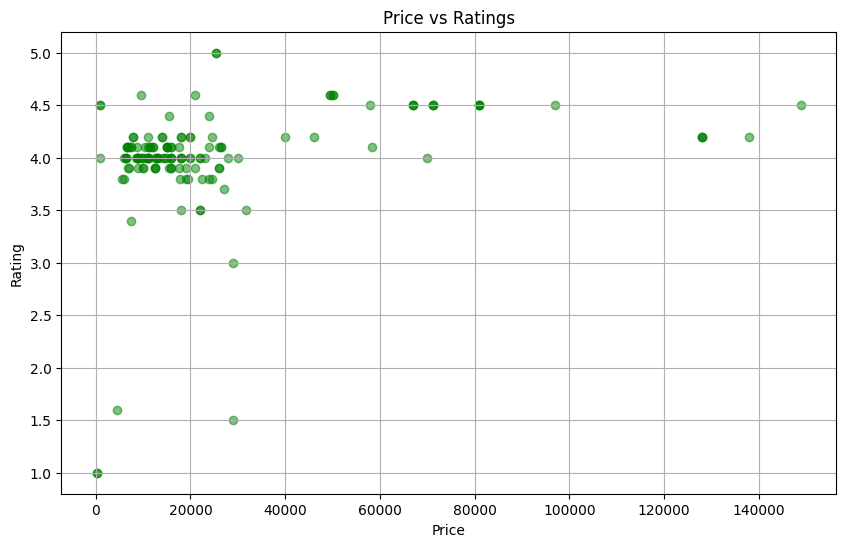

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(amazon_df['Price'],amazon_df['Rating'],color='green',alpha=0.5)
plt.title('Price vs Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [28]:
# Count occurrences of 'in stock' in the 'Availability' column
in_stock_count = amazon_df['Availability'].str.contains('In stock', case=False).sum()
print("Number of items in stock:", in_stock_count)

Number of items in stock: 142


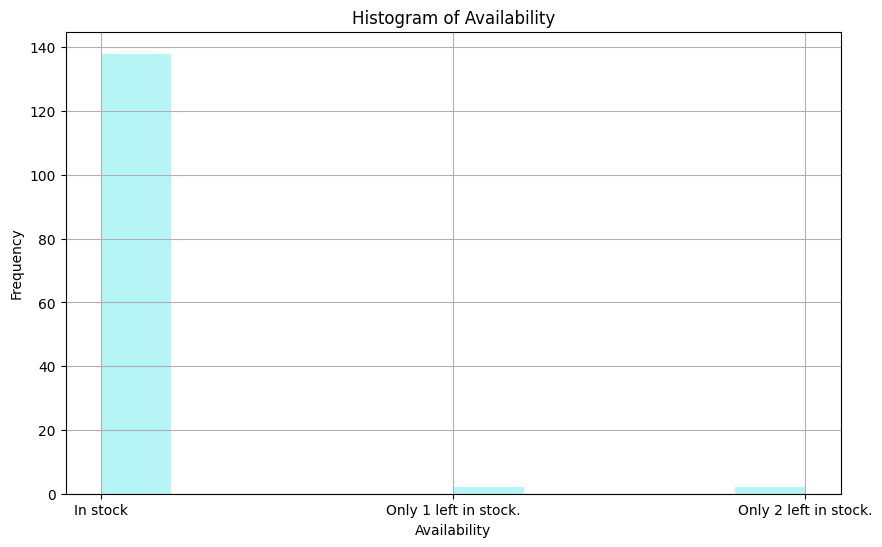

In [29]:
plt.figure(figsize=(10,6))
plt.hist(amazon_df['Availability'],bins=10, color='#98f2f2', alpha=0.7)
plt.title('Histogram of Availability')
plt.xlabel('Availability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

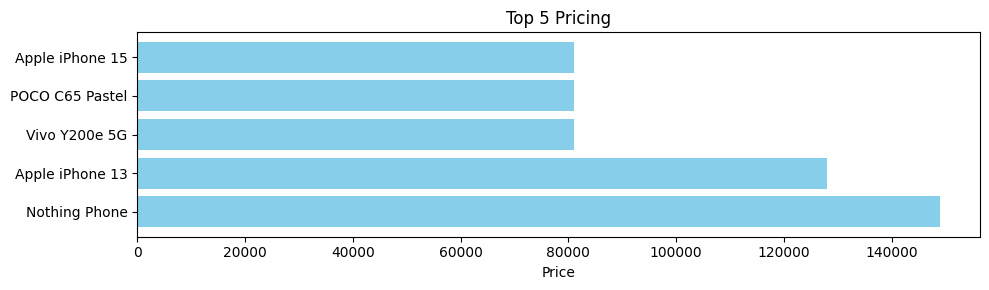

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(10, 3))

# Plotting top rated mobile pricing
axes.barh(top_rating['Mobile Name'], top_pricing['Price'], color='skyblue')
axes.set_xlabel('Price')
axes.set_title('Top 5 Pricing')

plt.tight_layout()
plt.show()


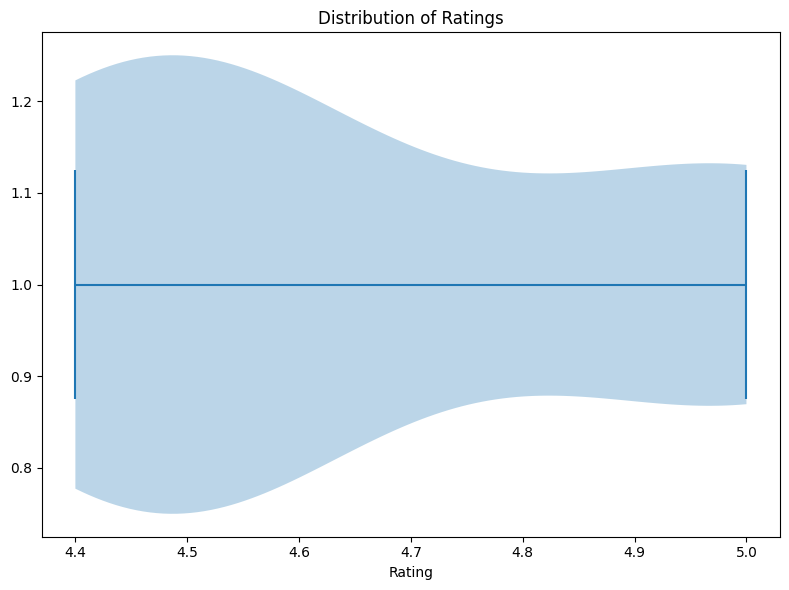

In [88]:
# Create a violin plot
fig, axes = plt.subplots(figsize=(8, 6))
axes.violinplot(top_rating['Rating'], vert=False)
axes.set_xlabel('Rating')
axes.set_title('Distribution of Ratings')
plt.tight_layout()
plt.show()


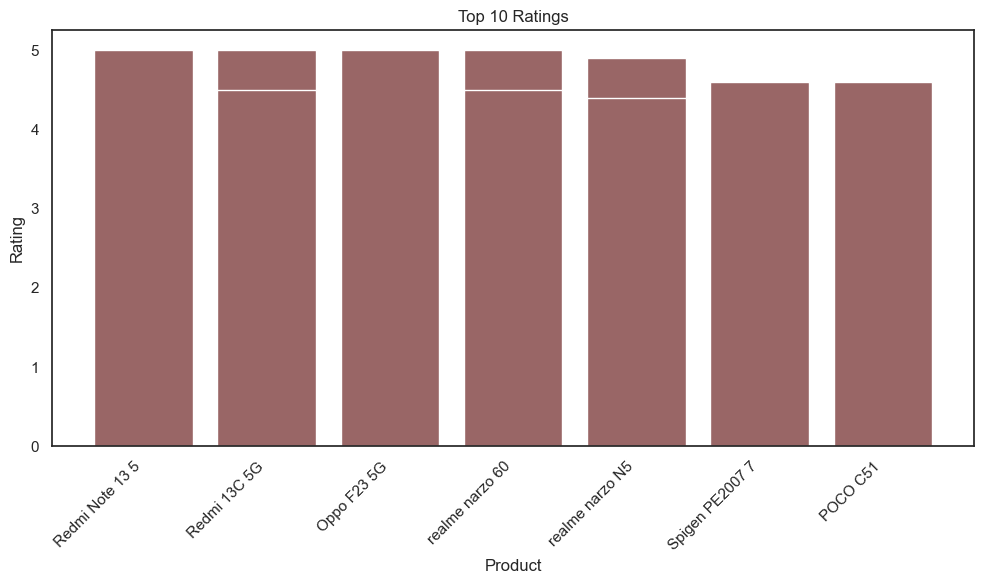

In [65]:
# Create a vertical bar plot
fig, axes = plt.subplots(figsize=(10, 6))
axes.bar(top_shortproduct, top_rating['Rating'], color='#996666')
axes.set_ylabel('Rating')
axes.set_xlabel('Product')
axes.set_title('Top 10 Ratings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


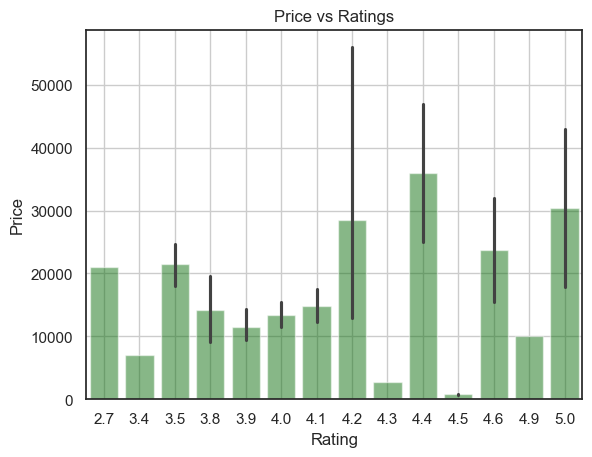

In [60]:
import seaborn as sns

sns.set(style="white", color_codes=True)
sns.barplot(x='Rating', y='Price', data=amazon_df, color='green', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price vs Ratings')
plt.grid(True)
plt.show()
